#### Deep Learning Jump Start with Azure Databricks

##### Problem Statement:
###### Build and Train a Deep Convolution Network to Classify Images in the CIFAR10 dataset using Keras on Azure Databricks
<br>
##### The CIFAR-10 dataset:
The CIFAR-10 dataset consists of **60000 32x32** colour images in **10 classes**, with **6000** images per class. There are **50000** training images and **10000** test images. 
<br>
###### Image Classes Example
<img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/CIFAR10.png?raw=true" alt="CIFAR10" width="400"/>

<br>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200"/>
##### **Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
* In this Technical Lab we will use Tensorflow as the backend for Keras

Keras is one of the leading frameworks to build deep learning models, It

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

#### Useful Shortcuts
##### 1. EDIT Cell --  < ENTER >
##### 2. Execute Cell -- < CTRL > + < ENTER >
##### 3. Execute Cell move to next -- < SHIFT > + < ENTER >
##### 4. Scroll Down - < SPACEBAR >
##### 5. Scroll UP - < SHIFT > + < SPACEBAR >

##### Step 1 - Library Import & general setup
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers
* Matplotlib

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.

###### Validate GPU accessibility

In [6]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

###### Define Helper functions for plots and image display

In [8]:
def plotmetrics(history):
  width = 10
  height = 5
  ## Clear plot if repeated call
  plt.clf()
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

In [9]:
def plotImages( images_arr, n_images=8):
    fig, axes = plt.subplots(n_images, n_images, figsize=(9,9))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
    
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plot = plt.tight_layout()
    return plot

##### Step 2 - Load and process CIFAR 10 Dataset

In [11]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

 8192/170498071 [..............................] - ETA: 9:57
 90112/170498071 [..............................] - ETA: 2:44
 368640/170498071 [..............................] - ETA: 1:07
 1122304/170498071 [..............................] - ETA: 30s 
 3170304/170498071 [..............................] - ETA: 14s
 4349952/170498071 [..............................] - ETA: 12s
 5611520/170498071 [..............................] - ETA: 11s
 7725056/170498071 [>.............................] - ETA: 9s 
 9183232/170498071 [>.............................] - ETA: 8s
 10657792/170498071 [>.............................] - ETA: 8s
 12148736/170498071 [=>............................] - ETA: 8s
 13000704/170498071 [=>............................] - ETA: 8s
 14295040/170498071 [=>............................] - ETA: 7s
 15310848/170498071 [=>............................] - ETA: 7s
 16343040/170498071 [=>............................] - ETA: 7s
 17375232/170498071 [==>...........................] - ETA: 7s
 18440192/170498071 [==>...........................] - ETA: 7s
 19505152/170498071 [==>...........................] - ETA: 7s
 20439040/170498071 [==>...........................] - ETA: 7s
 21192704/170498071 [==>...........................] - ETA: 8s
 21929984/170498071 [==>...........................] - ETA: 8s
 22700032/170498071 [==>...........................] - ETA: 8s
 23470080/170498071 [===>..........................] - ETA: 8s
 24240128/170498071 [===>..........................] - ETA: 8s
 25010176/170498071 [===>..........................] - ETA: 8s
 25780224/170498071 [===>..........................] - ETA: 8s
 26501120/170498071 [===>..........................] - ETA: 8s
 27058176/170498071 [===>..........................] - ETA: 8s
 27615232/170498071 [===>..........................] - ETA: 8s
 28172288/170498071 [===>..........................] - ETA: 8s
 28762112/170498071 [====>.........................] - ETA: 8s
 29335552/170498071 [====>.........................] - ETA: 8s
 29908992/170498071 [====>.........................] - ETA: 8s
 30498816/170498071 [====>.........................] - ETA: 9s
 31072256/170498071 [====>.........................] - ETA: 9s
 31662080/170498071 [====>.........................] - ETA: 9s
 32251904/170498071 [====>.........................] - ETA: 9s
 32743424/170498071 [====>.........................] - ETA: 9s
 33103872/170498071 [====>.........................] - ETA: 9s
 33398784/170498071 [====>.........................] - ETA: 9s
 33693696/170498071 [====>.........................] - ETA: 9s
 34004992/170498071 [====>.........................] - ETA: 9s
 34299904/170498071 [=====>........................] - ETA: 9s
 34594816/170498071 [=====>........................] - ETA: 10s
 34889728/170498071 [=====>........................] - ETA: 10s
 35201024/170498071 [=====>........................] - ETA: 10s
 35512320/170498071 [=====>........................] - ETA: 10s
 35823616/170498071 [=====>........................] - ETA: 10s
 36134912/170498071 [=====>........................] - ETA: 10s
 36462592/170498071 [=====>........................] - ETA: 10s
 36773888/170498071 [=====>........................] - ETA: 10s
 37101568/170498071 [=====>........................] - ETA: 10s
 37429248/170498071 [=====>........................] - ETA: 10s
 37756928/170498071 [=====>........................] - ETA: 11s
 38084608/170498071 [=====>........................] - ETA: 11s
 38428672/170498071 [=====>........................] - ETA: 11s
 38772736/170498071 [=====>........................] - ETA: 11s
 39100416/170498071 [=====>........................] - ETA: 11s
 39280640/170498071 [=====>........................] - ETA: 11s
 39673856/170498071 [=====>........................] - ETA: 11s
 39919616/170498071 [======>.......................] - ETA: 11s
 40148992/170498071 [======>.......................] - ETA: 11s

##### Display Training Image Samples (#100)
Here is a sample of the actual images from the Training set

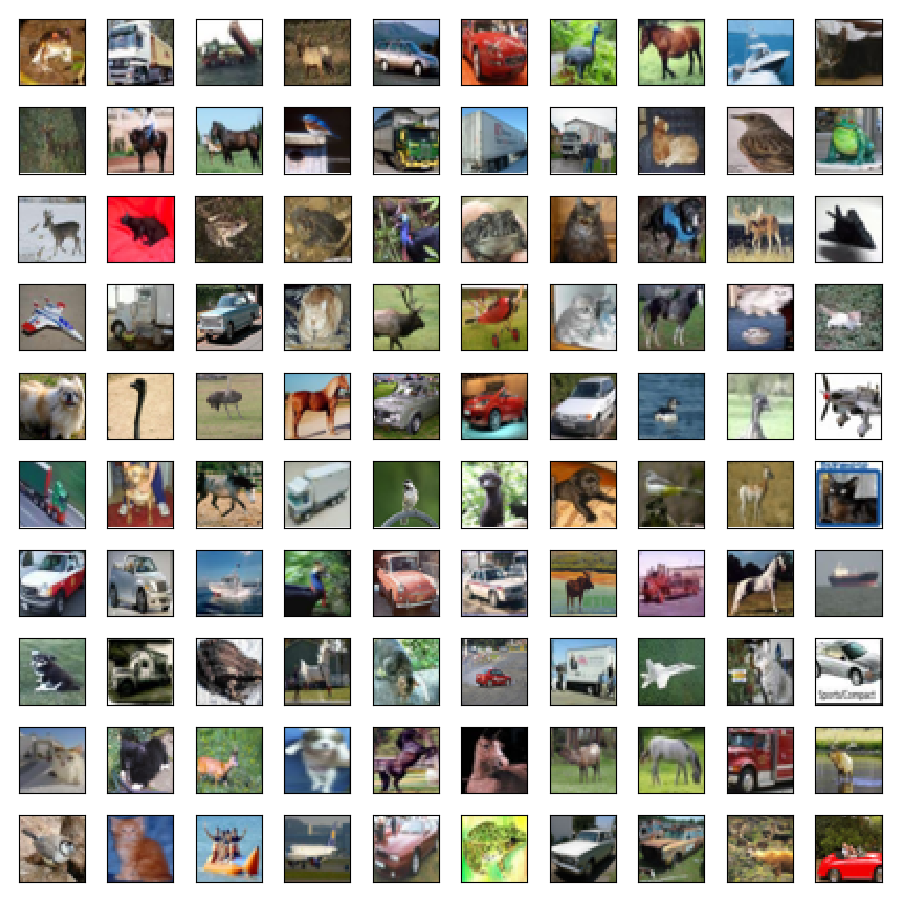

In [13]:
display(plotImages(x_train,n_images=10))

##### Preprocessing Steps
1. Convert class vectors to binary class matrices
2. Cast PIXEL Values to FLOAT
3. Normalize Pixel RGB Values to (0:1)

In [15]:
#1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#2
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#3
x_train /= 255
x_test /= 255

##### Initial Model Training ParametersParameter Setup

1. **Batch Size** - Defines the number of samples that will be propagated through the network.<br>
    We will use a batch size of **32** in this Lab
    
2. **Number of Classes**<br>
    CIFAR10 Datasets has **10** target classes
    
3. **Epochs** - Number times that the learning algorithm will run through the entire training dataset.<br>
    We will use **25 Epochs** in this lab to reduce the overall training time

In [17]:
batch_size = 32
num_classes = 10
epochs = 25

##### Step 3 - Define Convolution Network

In [19]:
def initializeModel():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [20]:
model = initializeModel()

In [21]:
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_1 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_1 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_2 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_2 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_1 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_3 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_3 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_4 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_4 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_2 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_1 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_1 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_5 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_3 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_2 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_6 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

##### Step 4 - Define Optimizers and Compile the model

**Optimization algorithms** are used to minimize (or maximize) an Objective function (also called Error function) E(x) which is mathematical function dependent on the Model’s internal learnable parameters that are used in computing the target values(Y) from the set of predictors(X) used by the machine learning model. In neural networks the Weights(W) and the Bias(b) values are the learnable parameters which are used in computing the output values and are learned and updated in the direction of best solution i.e minimizing the Loss by the network’s training process.

Below are som of the most used optimizers available in Keras:
1. Stochastic Gradient Descent (SGD)
2. Root Mean Square Propagation (RMSProp)
3. Adaptive Gradient (ADAGrad)
4. Adaptive Moment Estimation (ADAM)
  
**Hyper Parameters**
  Two hyper parameters used by most optimizers are:
  1. Learning Rate - Learning rate (lr) controls the magnitude of adjustment of the weights of the neural network with respect the loss gradient.
  2. Decay - Weight decay is a regularization term that causes weights to exponentially decay to zero and hence penalizes big weights.

In [23]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Step 5 - Model Training : without Data Augmentation (Takes 5-8 Mins)

In [25]:
from keras.callbacks import History 
history_noAug = History()
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history_noAug],
         verbose=1)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25

 32/50000 [..............................] - ETA: 29:58 - loss: 2.3197 - acc: 0.1875
 64/50000 [..............................] - ETA: 15:43 - loss: 2.3872 - acc: 0.1406
 128/50000 [..............................] - ETA: 8:13 - loss: 2.3620 - acc: 0.1484 
 192/50000 [..............................] - ETA: 5:44 - loss: 2.3419 - acc: 0.1406
 256/50000 [..............................] - ETA: 4:32 - loss: 2.3437 - acc: 0.1250
 320/50000 [..............................] - ETA: 3:45 - loss: 2.3427 - acc: 0.1094
 384/50000 [..............................] - ETA: 3:15 - loss: 2.3362 - acc: 0.1120
 448/50000 [..............................] - ETA: 2:55 - loss: 2.3312 - acc: 0.1138
 512/50000 [..............................] - ETA: 2:39 - loss: 2.3247 - acc: 0.1211
 576/50000 [..............................] - ETA: 2:25 - loss: 2.3264 - acc: 0.1163
 640/50000 [..............................] - ETA: 2:15 - loss: 2.3222 - acc: 0.1234
 704/50000 [..............................] - ETA: 2:07 - loss: 2.3233 - acc: 0.1179
 768/50000 [..............................] - ETA: 2:00 - loss: 2.3229 - acc: 0.1146
 832/50000 [..............................] - ETA: 1:55 - loss: 2.3205 - acc: 0.1118
 896/50000 [..............................] - ETA: 1:49 - loss: 2.3219 - acc: 0.1083
 960/50000 [..............................] - ETA: 1:45 - loss: 2.3215 - acc: 0.1083
 1024/50000 [..............................] - ETA: 1:41 - loss: 2.3203 - acc: 0.1055
 1088/50000 [..............................] - ETA: 1:37 - loss: 2.3184 - acc: 0.1057
 1152/50000 [..............................] - ETA: 1:34 - loss: 2.3176 - acc: 0.1076
 1216/50000 [..............................] - ETA: 1:32 - loss: 2.3171 - acc: 0.1044
 1280/50000 [..............................] - ETA: 1:29 - loss: 2.3158 - acc: 0.1055
 1344/50000 [..............................] - ETA: 1:27 - loss: 2.3144 - acc: 0.1086
 1408/50000 [..............................] - ETA: 1:25 - loss: 2.3134 - acc: 0.1072
 1472/50000 [..............................] - ETA: 1:24 - loss: 2.3126 - acc: 0.1073
 1536/50000 [..............................] - ETA: 1:22 - loss: 2.3118 - acc: 0.1094
 1600/50000 [..............................] - ETA: 1:20 - loss: 2.3108 - acc: 0.1100
 1664/50000 [..............................] - ETA: 1:18 - loss: 2.3114 - acc: 0.1076
 1728/50000 [>.............................] - ETA: 1:17 - loss: 2.3111 - acc: 0.1071
 1792/50000 [>.............................] - ETA: 1:16 - loss: 2.3100 - acc: 0.1088
 1856/50000 [>.............................] - ETA: 1:15 - loss: 2.3099 - acc: 0.1072
 1920/50000 [>.............................] - ETA: 1:13 - loss: 2.3101 - acc: 0.1083
 1984/50000 [>.............................] - ETA: 1:12 - loss: 2.3094 - acc: 0.1084
 2048/50000 [>.............................] - ETA: 1:11 - loss: 2.3088 - acc: 0.1079
 2112/50000 [>.............................] - ETA: 1:10 - loss: 2.3079 - acc: 0.1080
 2176/50000 [>.............................] - ETA: 1:09 - loss: 2.3063 - acc: 0.1085
 2272/50000 [>.............................] - ETA: 1:08 - loss: 2.3043 - acc: 0.1096
 2336/50000 [>.............................] - ETA: 1:07 - loss: 2.3046 - acc: 0.1079
 2400/50000 [>.............................] - ETA: 1:06 - loss: 2.3041 - acc: 0.1083
 2464/50000 [>.............................] - ETA: 1:05 - loss: 2.3038 - acc: 0.1088
 2528/50000 [>.............................] - ETA: 1:05 - loss: 2.3027 - acc: 0.1100
 2592/50000 [>.............................] - ETA: 1:04 - loss: 2.3027 - acc: 0.1092
 2656/50000 [>.............................] - ETA: 1:04 - loss: 2.3028 - acc: 0.1096
 2720/50000 [>.............................] - ETA: 1:04 - loss: 2.3025 - acc: 0.1099
 2784/50000 [>.............................] - ETA: 1:03 - loss: 2.3021 - acc: 0.1106
 2848/50000 [>.............................] - ETA: 1:02 - loss: 2.3019 - acc: 0.1110
 2912/50000 [>.............................] - ETA: 1:

###### Evaluate the model (to Get final test accuracy and loss)

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.764
Test loss: 0.6978529773712158

##### Visualize Model metrics

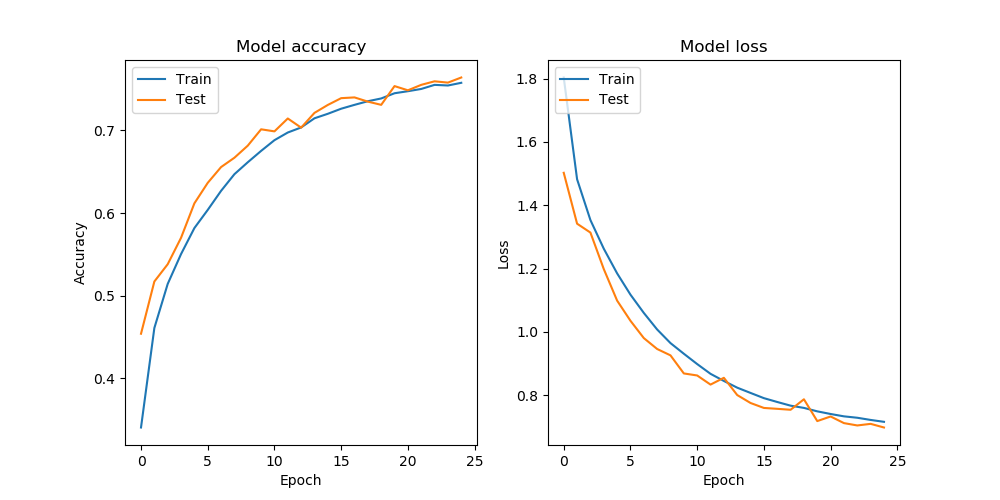

In [29]:
pltoutput = plotmetrics(history_noAug)
display(pltoutput)

##### Step 6 - Model Training with Data Augmentation (Takes 5-10 Minutes)

In [31]:
model = initializeModel()
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [32]:
from keras.callbacks import History 
history_Aug = History()
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                     callbacks=[history_Aug],
                   verbose =1)

Using real-time data augmentation.
Epoch 1/25

 1/1562 [..............................] - ETA: 14:52 - loss: 2.2779 - acc: 0.2188
 6/1562 [..............................] - ETA: 2:43 - loss: 2.2963 - acc: 0.1823 
 11/1562 [..............................] - ETA: 1:37 - loss: 2.3075 - acc: 0.1477
 16/1562 [..............................] - ETA: 1:12 - loss: 2.3019 - acc: 0.1445
 21/1562 [..............................] - ETA: 59s - loss: 2.2984 - acc: 0.1384 
 26/1562 [..............................] - ETA: 51s - loss: 2.2971 - acc: 0.1346
 31/1562 [..............................] - ETA: 45s - loss: 2.2979 - acc: 0.1290
 36/1562 [..............................] - ETA: 41s - loss: 2.2967 - acc: 0.1224
 41/1562 [..............................] - ETA: 37s - loss: 2.2966 - acc: 0.1242
 46/1562 [..............................] - ETA: 35s - loss: 2.2941 - acc: 0.1277
 52/1562 [..............................] - ETA: 33s - loss: 2.2912 - acc: 0.1298
 58/1562 [>.............................] - ETA: 31s - loss: 2.2927 - acc: 0.1239
 64/1562 [>.............................] - ETA: 29s - loss: 2.2907 - acc: 0.1250
 68/1562 [>.............................] - ETA: 28s - loss: 2.2879 - acc: 0.1259
 74/1562 [>.............................] - ETA: 27s - loss: 2.2862 - acc: 0.1284
 80/1562 [>.............................] - ETA: 26s - loss: 2.2879 - acc: 0.1270
 86/1562 [>.............................] - ETA: 25s - loss: 2.2845 - acc: 0.1290
 92/1562 [>.............................] - ETA: 24s - loss: 2.2830 - acc: 0.1311
 96/1562 [>.............................] - ETA: 24s - loss: 2.2820 - acc: 0.1318
 101/1562 [>.............................] - ETA: 24s - loss: 2.2800 - acc: 0.1306
 106/1562 [=>............................] - ETA: 23s - loss: 2.2779 - acc: 0.1303
 111/1562 [=>............................] - ETA: 23s - loss: 2.2762 - acc: 0.1292
 116/1562 [=>............................] - ETA: 23s - loss: 2.2751 - acc: 0.1296
 121/1562 [=>............................] - ETA: 22s - loss: 2.2727 - acc: 0.1317
 126/1562 [=>............................] - ETA: 22s - loss: 2.2699 - acc: 0.1339
 131/1562 [=>............................] - ETA: 22s - loss: 2.2677 - acc: 0.1365
 136/1562 [=>............................] - ETA: 21s - loss: 2.2659 - acc: 0.1369
 141/1562 [=>............................] - ETA: 21s - loss: 2.2646 - acc: 0.1392
 146/1562 [=>............................] - ETA: 21s - loss: 2.2617 - acc: 0.1408
 151/1562 [=>............................] - ETA: 21s - loss: 2.2600 - acc: 0.1413
 156/1562 [=>............................] - ETA: 20s - loss: 2.2564 - acc: 0.1422
 161/1562 [==>...........................] - ETA: 20s - loss: 2.2544 - acc: 0.1448
 166/1562 [==>...........................] - ETA: 20s - loss: 2.2514 - acc: 0.1465
 171/1562 [==>...........................] - ETA: 20s - loss: 2.2477 - acc: 0.1495
 175/1562 [==>...........................] - ETA: 20s - loss: 2.2469 - acc: 0.1495
 180/1562 [==>...........................] - ETA: 20s - loss: 2.2444 - acc: 0.1493
 185/1562 [==>...........................] - ETA: 19s - loss: 2.2397 - acc: 0.1515
 190/1562 [==>...........................] - ETA: 19s - loss: 2.2362 - acc: 0.1535
 195/1562 [==>...........................] - ETA: 19s - loss: 2.2346 - acc: 0.1548
 200/1562 [==>...........................] - ETA: 19s - loss: 2.2308 - acc: 0.1562
 205/1562 [==>...........................] - ETA: 19s - loss: 2.2280 - acc: 0.1569
 210/1562 [===>..........................] - ETA: 19s - loss: 2.2237 - acc: 0.1598
 215/1562 [===>..........................] - ETA: 18s - loss: 2.2202 - acc: 0.1609
 220/1562 [===>..........................] - ETA: 18s - loss: 2.2163 - acc: 0.1621
 225/1562 [===>..........................] - ETA: 18s - loss: 2.2128 - acc: 0.1642
 230/1562 [===>..........................] - ETA: 18s - loss: 2.2085 - acc: 0.1668
 235/1562 [===>..........................] - ETA: 18s - loss: 2.2069 - acc: 0.1680
 240/1562 [===>..........................] - ETA: 18s - loss: 2.20

###### Evaluate the model (to Get final test accuracy and loss)

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7352
Test loss: 0.7858477430343628

##### Visualize Model metrics

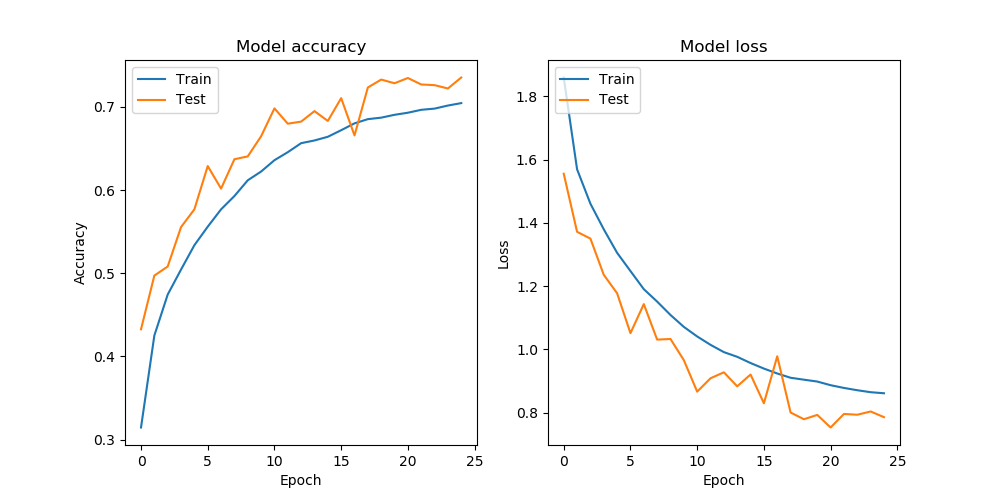

In [36]:
pltoutput = plotmetrics(history_Aug)
display(pltoutput)

##### Summary
The process of building Deep Learning models on Azure Databricks can be summarized as :

1. **Setup/Configuration:**<br>
  * Resource creation and configuration.
  * Library installation<br>
2. **Data Processing:**<br>
  * Data Ingestion
  * Data Preparation/Feature Engineering<br>
3. **Modeling:**<br>
  * Network definition
  * Hyper Parameter definition/Tuning
  * Model Training
  * Model Evaluation
  
  #### Deep Learning on Azure Databricks – Process Flow
  <img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/processflow.png?raw=true" alt="Process Flow" width="1000"/>